In [1]:
import codecs
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt 

In [2]:
def read(file):
	fp = codecs.open(file,"r",encoding='utf-8', errors='ignore')
	text = fp.read()
	return text

def draw_plot(degree,cou_nod,present,msg):
    
    mde=np.max(degree)+1
    Y=[0 for i in range(int(mde))]
    
    x=[]
    y1=[]
    
    for i in range(int(len(present))):
        if present[i]>0:
            Y[int(degree[i])]+=1.0
    
    for i in range(0,len(Y)):
        if Y[i]>0:
            y1.append(Y[i])
            x.append(i)
    
    y=np.array(y1)/cou_nod
    
    plt.bar(x,y,color=['r','b','g'],width=5)
    #plt.plot(x,y,color='b')
    plt.scatter(x,y,color='r',s=4)
    plt.xlabel('Degree ->') 
    plt.ylabel('P(Degreee) ->') 
    plt.title(msg)  
    plt.show() 
    
    return [y1,x]

In [3]:
# Reading the Network Graph

path='email.txt'

data=read(path).split('\n')
data=data[:len(data)-1]

edges=[]                 # It will hold edges of the network
nodes={}                 # It will hold Out-link of a node in the graph
nodeo={}                 # It will hold In-link of a node in the graph

cou_ed=0 
for each in data:
    
    edge=each.split(" ")
    edge=[float(i) for i in edge]
    edges.append(edge)
    
    if edge[0] not in nodes.keys():
        nodes[edge[0]]=[]
        nodes[edge[0]].append([edge[1],1])
    else:
        nodes[edge[0]].append([edge[1],1])
        
    if edge[1] not in nodes.keys():
        nodes[edge[1]]=[]
        
        
    if edge[0] not in nodeo.keys():
        nodeo[edge[0]]=[]
    if edge[1] not in nodeo.keys():
        nodeo[edge[1]]=[]
        nodeo[edge[1]].append([edge[0],1])
    else:
        nodeo[edge[1]].append([edge[0],1])
        

        
    cou_ed+=1.0

cou_nod=0                  # It denotes number of nodes in the graph
node=[]        
graph=[]                   # Adjacency matrix

for each in nodes.keys():
    node.append(each)
    nodes[each].sort()
    nodeo[each].sort()
    cou_nod+=1.0

In [4]:
mid=np.max(np.array(node))+1

inedge=[0 for i in range(int(mid))]
outedge=[0 for i in range(int(mid))]

mind=0
ind=0

moud=0
ond=0

present=[0 for i in range(int(mid))]

for each in edges:
    
    present[int(each[1])]=1
    present[int(each[0])]=1
    
    inedge[int(each[1])]+=1.0
    if inedge[int(each[1])]>mind:
        mind=inedge[int(each[1])]
        ind=int(each[1])
        
    outedge[int(each[0])]+=1.0
    if outedge[int(each[0])]>moud:
        moud=outedge[int(each[0])]
        ond=int(each[0])
        
for i in tqdm(range(len(present))):
    arr=[0 for i in range(len(present))]
    if present[i]==1:
        for each in nodes[i]:
            arr[int(each[0])]+=1.0
    graph.append([i,arr])        

100%|██████████| 1005/1005 [00:00<00:00, 12579.46it/s]


In [5]:
# Display the details of the graph choosen

print()
print()
print("-------------------------------------------------------------------------------------------------------------------------------------")
print()
print("\tDescription about the Network\n")
print("\tNumber of nodes- ",int(cou_nod))
print("\tNumber of edges- ",int(cou_ed))
print("\tAverage inDegree- ",np.sum(inedge)/cou_nod)
print("\tAverage outDegree- ",np.sum(outedge)/cou_nod)
print("\tMax InDegree node id- ",ind,"\twith inDegree ",mind)
print("\tMax OutDegree node id- ",ond,"\twith outDegree ",moud)
print("\tAverage Network Density- ",cou_ed/(cou_nod*(cou_nod-1)))

inedge1=np.array(inedge)
outedge1=np.array(outedge)
degree=(np.array(inedge)+np.array(outedge))
print()
print("-------------------------------------------------------------------------------------------------------------------------------------")



-------------------------------------------------------------------------------------------------------------------------------------

	Description about the Network

	Number of nodes-  1005
	Number of edges-  25571
	Average inDegree-  25.443781094527363
	Average outDegree-  25.443781094527363
	Max InDegree node id-  160 	with inDegree  212.0
	Max OutDegree node id-  160 	with outDegree  334.0
	Average Network Density-  0.025342411448732432

-------------------------------------------------------------------------------------------------------------------------------------


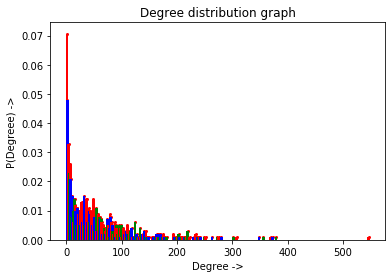

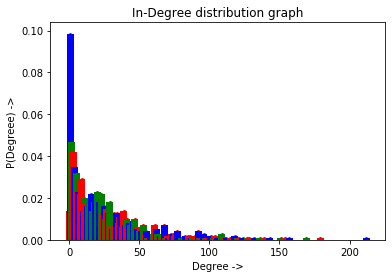

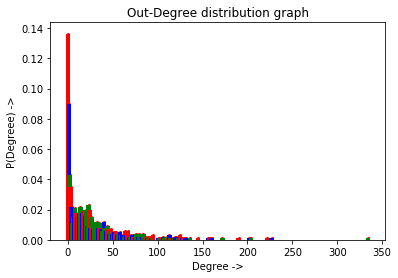

In [6]:
x=draw_plot(degree,cou_nod,present,"Degree distribution graph")       #Total degree(In+Out) distributions
x1=draw_plot(inedge1,cou_nod,present,"In-Degree distribution graph")     #Total In-degree distributions
x2=draw_plot(outedge1,cou_nod,present,"Out-Degree distribution graph")     #Total Out-degree distributions

In [7]:
clu_coe=[0.0 for i in range(int(mid))]

no_ed=[]
ch=[]

for each in nodes.keys():
    
    ed=nodes[each]
    ed1=nodeo[each]
    ed.extend(ed1)
    nei=[]
    for eac in ed:
        if eac[0] not in nei and eac[0]!=each:
            nei.append(eac[0])
        
    coub=0.0   
    for i in range(len(nei)):
        eac=nei[i]
        for j in range(0,len(nei)):
            eac1=nei[j]
            if eac !=eac1:
                
                if graph[int(eac)][1][int(eac1)]==1 or graph[int(eac1)][1][int(eac)]==1:
                    
                    coub+=1.0
                    
                #if graph[int(eac1)][1][int(eac)]==1:
                #    coub+=1.0
                    
                    
    tol=len(nei)*(len(nei)-1)
    coub=coub
    ch.append([coub,len(nei),tol])
    
    if tol!=0:
        clu_coe[int(each)]=coub/tol
        
    else:
        no_ed.append(each)
print()
print("Average cluster coefficient- ",np.sum(np.array(clu_coe))/cou_nod)
print()


Average cluster coefficient-  0.39935496642215434



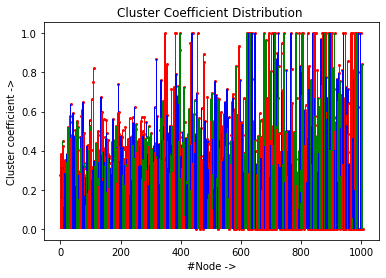

In [8]:
plt.bar(range(len(clu_coe)),clu_coe,color=['r','b','g'],width=5)
plt.scatter(range(len(clu_coe)),clu_coe,color='r',s=4)
plt.xlabel('#Node ->') 
plt.ylabel('Cluster coefficient ->') 
plt.title('Cluster Coefficient Distribution ')  
plt.show() 

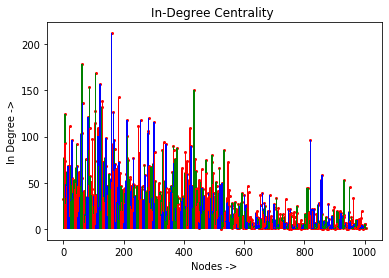

In [9]:
plt.bar(range(len(inedge1)),inedge1,color=['r','b','g'],width=5)
plt.scatter(range(len(inedge1)),inedge1,color='r',s=4)
plt.xlabel('Nodes ->') 
plt.ylabel('In Degree ->') 
plt.title('In-Degree Centrality ')  
plt.show()

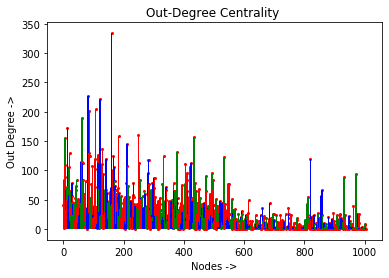

In [10]:
plt.bar(range(len(outedge1)),outedge1,color=['r','b','g'],width=5)
plt.scatter(range(len(outedge1)),outedge1,color='r',s=4)
plt.xlabel('Nodes ->') 
plt.ylabel('Out Degree ->') 
plt.title('Out-Degree Centrality ')  
plt.show()

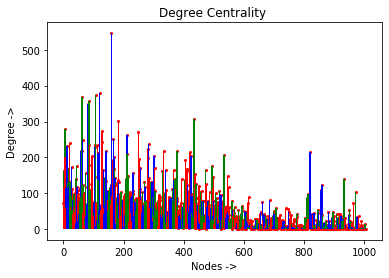

In [11]:
plt.bar(range(len(degree)),degree,color=['r','b','g'],width=5)
plt.scatter(range(len(degree)),degree,color='r',s=4)
plt.xlabel('Nodes ->') 
plt.ylabel('Degree ->') 
plt.title('Degree Centrality ')  
plt.show()